# Analyze

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df1 = pd.read_excel("correlationbetweenVariables.xlsx")
df1.head()

Saving correlationbetweenVariables.xlsx to correlationbetweenVariables (5).xlsx


,product_id,product_name,brand_name,price_usd,skin_tone,eye_color,skin_type,rating,is_recommended,helpfulness,review_text,review_title
0,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,lightMedium,green,combination,5,1.0,0.000000,I absolutely L-O-V-E this oil. I have acne pro...,A must have!
1,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,mediumTan,brown,oily,3,1.0,0.333333,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control
2,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,lightMedium,brown,dry,5,1.0,1.000000,Works well as soon as I wash my face and pat d...,Worth the money!
3,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,fair,blue,combination,5,1.0,0.933333,Super short back story- when I was in my teens...,My favorite for many years
4,379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0,light,hazel,combination,5,1.0,1.000000,first oil that I‚Äôve tried and I really like ...,NaN


In [2]:
num_missing = df1.isna().sum()
num_missing

,0
product_id,0
product_name,0
brand_name,0
price_usd,0
skin_tone,22449
eye_color,20923
skin_type,11236
rating,0
is_recommended,12713
helpfulness,65462


In [3]:
df1[['is_recommended', 'helpfulness']] = df1[['is_recommended', 'helpfulness']].fillna(
    df1[['is_recommended', 'helpfulness']].mean()
)

In [4]:
df1.isnull().sum()

,0
product_id,0
product_name,0
brand_name,0
price_usd,0
skin_tone,22449
eye_color,20923
skin_type,11236
rating,0
is_recommended,0
helpfulness,0


In [5]:
df1.describe()

,product_id,price_usd,rating,is_recommended,helpfulness
count,1.692940e+05,169294.000000,169294.000000,169294.000000,169294.000000
mean,5.858118e+05,57.596627,4.308097,0.845186,0.762803
std,3.522734e+06,53.740922,1.161649,0.347882,0.244294
min,2.046000e+03,3.000000,1.000000,0.000000,0.000000
25%,4.363682e+05,29.000000,4.000000,1.000000,0.762803
50%,4.671110e+05,44.000000,5.000000,1.000000,0.762803
75%,4.804470e+05,69.000000,5.000000,1.000000,1.000000
max,9.162736e+07,1900.000000,5.000000,1.000000,1.000000


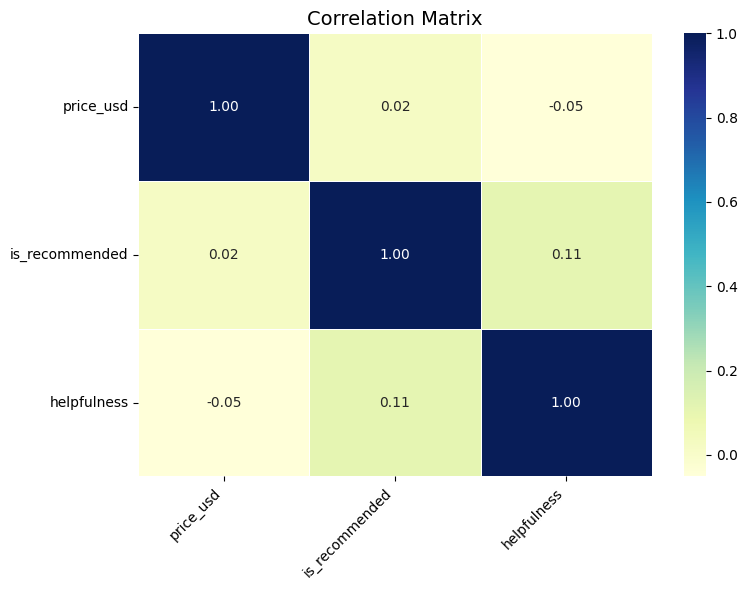

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only float (numeric) columns
float_df = df1.select_dtypes(include='float')

# Compute correlation matrix
corr_matrix = float_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# Adjust ticks and title
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
#Sort by products
import google.colab.files
uploaded = google.colab.files.upload()

import pandas as pd
df2 = pd.read_excel("most_recommended_products.xlsx")
df2.head()

Saving most_recommended_products.xlsx to most_recommended_products (5).xlsx


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,brand_name,product_name,avg_rating,review_count,recommended_count,not_recommended_count
0,GUERLAIN,Abeille Royale Intense Repair Youth Oil in Balm,3.0,1,0,1
1,Tata Harper,Glow Facial Set,3.0,1,0,1
2,Sulwhasoo,Essential Comfort Balancing Emulsion,4.0,1,0,1
3,Dr. Lara Devgan Scientific Beauty,Retinol + Bakuchiol Serum 2.5x,3.0,1,0,1
4,CLINIQUE,Repairwear Uplifting Firming Cream Broad Spect...,3.4,15,0,15


In [8]:
df2.isnull().sum()

,0
brand_name,0
product_name,0
avg_rating,0
review_count,0
recommended_count,0
not_recommended_count,0


In [9]:
df2.describe()

,avg_rating,review_count,recommended_count,not_recommended_count
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,4.201848,106.007514,82.867877,23.139637
std,0.522349,103.040913,88.356255,36.815021
min,1.000000,1.000000,0.000000,0.000000
25%,3.933333,19.000000,13.000000,3.000000
50%,4.287129,69.000000,46.000000,10.000000
75%,4.573864,172.000000,133.000000,28.000000
max,5.000000,492.000000,370.000000,315.000000


# **Filter**

In [10]:
import pandas as pd

df2['not_recommended_ratio'] = df2['not_recommended_count'] / df2['review_count']

to_remove = df2[
    (df2['review_count'] < 10) |
    (
        (df2['review_count'] < 19) & #25%
        (df2['avg_rating'] <= 1) & #min
        (df2['not_recommended_ratio'] >= 0.75)
    )
]

to_keep = df2.drop(to_remove.index)

print(f"Products to remove: {len(to_remove)}")
print(f"Products to keep: {len(to_keep)}")


Products to remove: 224
Products to keep: 1373


In [11]:
kept_items=to_keep[['brand_name','product_name']]
kept_items.head()

,brand_name,product_name
4,CLINIQUE,Repairwear Uplifting Firming Cream Broad Spect...
54,FOREO,Serum Serum Serum
120,CLINIQUE,Clinique Smart Clinical MD Multi-Dimensional A...
125,NuFACE,FIX Line Smoothing Device
132,HUM Nutrition,Arctic Repair Fine Lines and Wrinkles Supplement


In [12]:
kept_items = kept_items.copy()
kept_items['brand_name'] = kept_items['brand_name'].str.strip().str.lower()
kept_items['product_name'] = kept_items['product_name'].str.strip().str.lower()
print(len(kept_items))
kept_items.head()

1373


,brand_name,product_name
4,clinique,repairwear uplifting firming cream broad spect...
54,foreo,serum serum serum
120,clinique,clinique smart clinical md multi-dimensional a...
125,nuface,fix line smoothing device
132,hum nutrition,arctic repair fine lines and wrinkles supplement


In [13]:
# Clean both DataFrames exactly the same way
df1['brand_name'] = df1['brand_name'].astype(str).str.strip().str.lower()
df1['product_name'] = df1['product_name'].astype(str).str.strip().str.lower()

kept_items['brand_name'] = kept_items['brand_name'].astype(str).str.strip().str.lower()
kept_items['product_name'] = kept_items['product_name'].astype(str).str.strip().str.lower()

# Create product keys
df1['product_key'] = list(zip(df1['brand_name'], df1['product_name']))
kept_keys = set(zip(kept_items['brand_name'], kept_items['product_name']))

# Filter based on matched keys
matched_df1 = df1[df1['product_key'].isin(kept_keys)].drop(columns='product_key')
df1=matched_df1
print(len(df1))
df1.head()

168267


,product_id,product_name,brand_name,price_usd,skin_tone,eye_color,skin_type,rating,is_recommended,helpfulness,review_text,review_title
0,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,lightMedium,green,combination,5,1.0,0.000000,I absolutely L-O-V-E this oil. I have acne pro...,A must have!
1,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,mediumTan,brown,oily,3,1.0,0.333333,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control
2,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,lightMedium,brown,dry,5,1.0,1.000000,Works well as soon as I wash my face and pat d...,Worth the money!
3,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,fair,blue,combination,5,1.0,0.933333,Super short back story- when I was in my teens...,My favorite for many years
4,379064,lotus balancing & hydrating natural face treat...,clarins,65.0,light,hazel,combination,5,1.0,1.000000,first oil that I‚Äôve tried and I really like ...,NaN


In [14]:
df1.describe()

,product_id,price_usd,rating,is_recommended,helpfulness
count,1.682670e+05,168267.000000,168267.000000,168267.000000,168267.000000
mean,5.864787e+05,57.476281,4.309811,0.845769,0.762762
std,3.533457e+06,52.779495,1.159461,0.347231,0.244281
min,2.046000e+03,3.000000,1.000000,0.000000,0.000000
25%,4.363530e+05,29.000000,4.000000,1.000000,0.762803
50%,4.661140e+05,44.000000,5.000000,1.000000,0.762803
75%,4.803580e+05,69.000000,5.000000,1.000000,1.000000
max,9.162736e+07,449.000000,5.000000,1.000000,1.000000


In [15]:
df1.isnull().sum()

,0
product_id,0
product_name,0
brand_name,0
price_usd,0
skin_tone,22329
eye_color,20841
skin_type,11183
rating,0
is_recommended,0
helpfulness,0


# **DEEP LEARNING**

**Why there are low ratings? -> What is the right customer for that product?**

In [16]:
#checking low rating products
print(df1[df1['rating'] == 2].head(3))

    product_id                                       product_name brand_name  \
18      379064  lotus balancing & hydrating natural face treat...    clarins   
33      379064  lotus balancing & hydrating natural face treat...    clarins   
38      379064  lotus balancing & hydrating natural face treat...    clarins   

    price_usd skin_tone eye_color    skin_type  rating  is_recommended  \
18       65.0      fair     hazel  combination       2        0.000000   
33       65.0       NaN       NaN          NaN       2        1.000000   
38       65.0       NaN       NaN          NaN       2        0.845186   

    helpfulness                                        review_text  \
18     1.000000  It works well as a moisturizing oil, but it di...   
33     0.762803  I have Oily skin, mainly in my t-zone. used th...   
38     0.333333  This is the first time I felt the need to revi...   

                   review_title  
18  Moisturizes but that‚Äôs it  
33                          NaN  

In [17]:
low_rating_reviews = df1[(df1['is_recommended'] == 0) & (df1['rating'] < 3)]
print(low_rating_reviews.head(3))

     product_id                                       product_name  \
18       379064  lotus balancing & hydrating natural face treat...   
276      474843  absolue soft cream revitalizing & brightening ...   
284      422003                         daily reviving concentrate   

             brand_name  price_usd skin_tone eye_color    skin_type  rating  \
18              clarins       65.0      fair     hazel  combination       2   
276            lanc√¥me      150.0    medium     brown         oily       2   
284  kiehl's since 1851       59.0     light     hazel  combination       1   

     is_recommended  helpfulness  \
18              0.0         1.00   
276             0.0         0.40   
284             0.0         0.75   

                                           review_text  \
18   It works well as a moisturizing oil, but it di...   
276  This made my face break out. But it‚Äôs soft a...   
284  I was not happy with this product.  I didn‚Äôt...   

                    revi

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Make a copy to avoid SettingWithCopyWarning
low_rating_reviews = low_rating_reviews.copy()

# Apply text cleaning
low_rating_reviews['cleaned_text'] = low_rating_reviews['review_text'].apply(clean_text)

EXTRACT "OILY", "CAUSED BREAKOUTS" (Topic Modeling (LDA))
*   Use BERT for More Contextual Clustering

In [20]:
!pip install gensim

  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
shap 0.47.1 requires scikit-learn, which is not installed.
fastai 2.7.19 requires scikit-learn, which is not installed.
librosa 0.11.0 requires scikit-learn>=1.1.0, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
pynndescent 0.5.13 requires scikit-learn>=0.18, which is not installed.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is in

In [21]:
!pip install bertopic

  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached hdbscan-0.8.40-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
Using cached bertopic-0.17.0-py3-none-any.whl (150 kB)
Using cached hdbscan-0.8.40-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 29.9 MB/s eta 0:00:00
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)


In [24]:
# Nuke everything that might cause conflicts
!pip uninstall -y numpy bertopic umap-learn hdbscan scipy scikit-learn sentence-transformers

# Reinstall with strict compatibility
!pip install numpy==1.24.4 --force-reinstall
!pip install --no-cache-dir --upgrade bertopic

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: bertopic 0.17.0
Uninstalling bertopic-0.17.0:
  Successfully uninstalled bertopic-0.17.0
Found existing installation: umap-learn 0.5.7
Uninstalling umap-learn-0.5.7:
  Successfully uninstalled umap-learn-0.5.7
Found existing installation: hdbscan 0.8.40
Uninstalling hdbscan-0.8.40:
  Successfully uninstalled hdbscan-0.8.40
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: sentence-transformers 3.4.1
Uninstalling sentence-transformers-3.4.1:
  Successfully uninstalled sentence-transformers-3.4.1
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-many

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
^C


In [22]:
import numpy as np
print("✅ NumPy version:", np.__version__)

from bertopic import BERTopic
print("✅ BERTopic imported!")

✅ NumPy version: 1.24.4


AttributeError: module 'numpy' has no attribute 'dtypes'

In [22]:
from bertopic import BERTopic

AttributeError: module 'numpy' has no attribute 'dtypes'

In [31]:
docs = low_rating_reviews['cleaned_text'].tolist()
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

NameError: name 'BERTopic' is not defined